# Part 1 : Wikipedia Evolution

## How did change between 2007 and now ? 

In this part we investigate how Wikipedia evolved when compared to the 2007 version to the current one we use today. An interesting thought that occured to us was that the wikispeedia game was hard to play due to the not-so-up-to-date structure of the game. As players are using a restricted version from the 2007 Wikipedia data, this could also impact how the game is played. 

Before testing this hypothesis we first investigate how much it has changed between now and the 2024 version, to see if there is a significant difference. 

In the following part we will study  *only the 4587 articles* from the 2007 selection and compare them to their current corresponding version. 

### 1.1) Hyperlinks count 

We first look at the number of hyperlinks per page, as this is the factor the most suceptible to influence how the game is played. 


In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Loading data

links2007 = pd.read_csv('data/wikispeedia_paths-and-graph/links.tsv', sep='\t', comment='#', names=['linkSource', 'linkTarget'])
links2024 = pd.read_csv('data/2024/links2024.csv')

### Problem of missing links in 2024 : find updated version ?? or take out from analysis the 2007 ones 

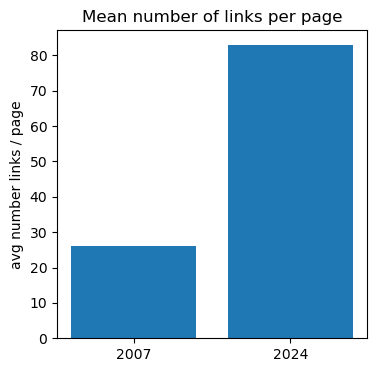

In [3]:
summary2007= (links2007.groupby(by='linkSource'))
summary2024= (links2024.groupby(by='linkSource'))

plt.figure(figsize=(4,4))
plt.bar(x=['2007', '2024'], height= [np.mean(summary2007.count()), np.mean(summary2024.count())])
plt.ylabel('avg number links / page')
plt.title('Mean number of links per page')
plt.show()

We can observe a big increase in the total average number of links in 2024, which is logical as the wikipedia database was greatly expanded (and is still expanding) between the two time points. Let us now look more into the details of how this expansion. 

In [ ]:
plt.bar( height=summary2007.count())
# plt.bar(x = summary2007.count().index.tolist(), height=summary2007.count())
# 

TypeError: bar() missing 1 required positional argument: 'height'

In [8]:
index= (summary2007.count())
index.linkTarget

linkSource
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in    11
%C3%85land                          19
%C3%89douard_Manet                  20
%C3%89ire                            8
%C3%93engus_I_of_the_Picts          10
                                    ..
Zionism                             74
Zirconium                           42
Zoroaster                           28
Zuid-Gelders                         5
Zulu                                15
Name: linkTarget, Length: 4587, dtype: int64

In [20]:
np.sort(summary2007.count().linkTarget)

array([  1,   1,   1, ..., 244, 255, 294], dtype=int64)

In [21]:
summary2007.size()

linkSource
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in    11
%C3%85land                          19
%C3%89douard_Manet                  20
%C3%89ire                            8
%C3%93engus_I_of_the_Picts          10
                                    ..
Zionism                             74
Zirconium                           42
Zoroaster                           28
Zuid-Gelders                         5
Zulu                                15
Length: 4587, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

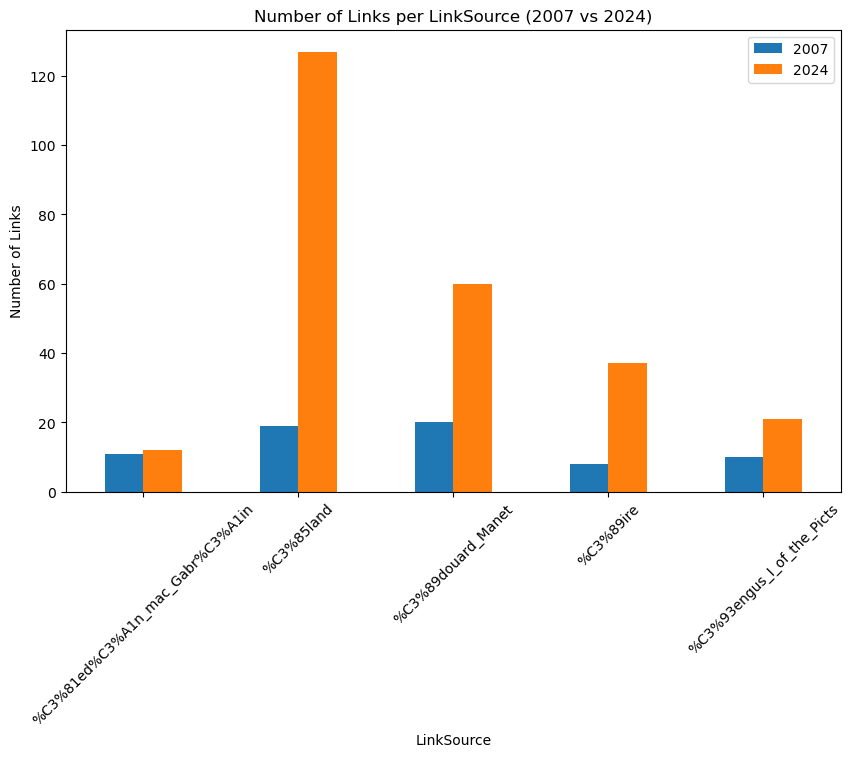

In [ ]:
# Aggregate counts of links per linkSource for each year
count_2007 = summary2007.size()
count_2024 = summary2024.size()

# Create a DataFrame for easy plotting with both years' data
counts_df = pd.DataFrame({'2007': count_2007[0:5], '2024': count_2024[0:5]})

# Plot the data
counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Links per LinkSource (2007 vs 2024)')
plt.xlabel('LinkSource')
plt.ylabel('Number of Links')
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()